In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
df.shape

(440, 8)

In [7]:
data=df.iloc[:10,2:6]

In [8]:
data.head()

Fresh  Milk  Grocery  Frozen
0  12669  9656     7561     214
1   7057  9810     9568    1762
2   6353  8808     7684    2405
3  13265  1196     4221    6404
4  22615  5410     7198    3915

In [9]:
from sklearn.preprocessing import normalize

In [10]:
df_norm=pd.DataFrame(normalize(data),columns=data.columns)

In [11]:
df_norm.head()

Fresh      Milk   Grocery    Frozen
0  0.718443  0.547580  0.428775  0.012136
1  0.454875  0.632326  0.616728  0.113574
2  0.469924  0.651517  0.568376  0.177895
3  0.863078  0.077817  0.274636  0.416672
4  0.917276  0.219432  0.291955  0.158794

In [15]:
#below scipy is used for creating dentrogram for the normalized data.

In [13]:
import scipy.cluster.hierarchy as shc

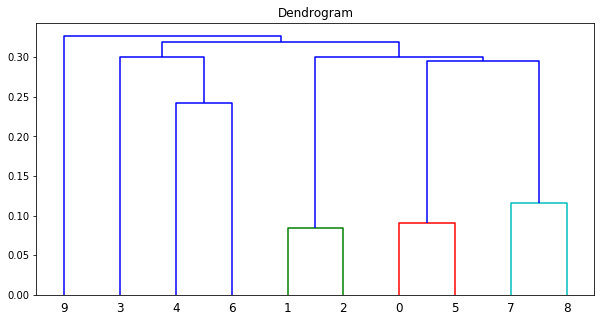

In [14]:
plt.figure(figsize=(10,5))
plt.title('Dendrogram')
den=shc.dendrogram(shc.linkage(df_norm))

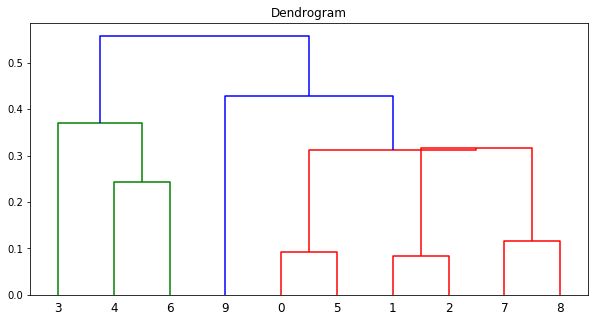

In [17]:
plt.figure(figsize=(10,5))
plt.title('Dendrogram')
den=shc.dendrogram(shc.centroid(df_norm))

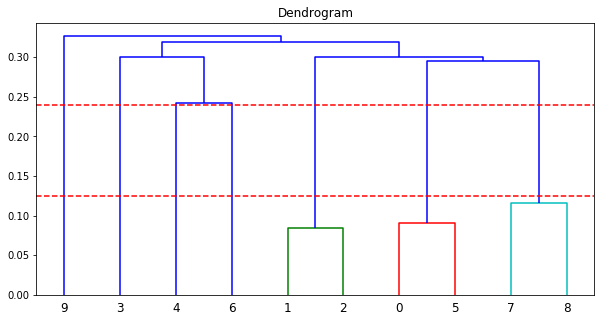

In [25]:
plt.figure(figsize=(10,5))
plt.title('Dendrogram')
den=shc.dendrogram(shc.linkage(df_norm))
plt.axhline(y=0.125,color='red',linestyle='--')
plt.axhline(y=0.24,color='red',linestyle='--')

In [26]:
#Above is for only 10 rows. Now doing it for all the rows

In [41]:
data_final=df.iloc[:,2:6]

In [42]:
data_final.head()

Fresh  Milk  Grocery  Frozen
0  12669  9656     7561     214
1   7057  9810     9568    1762
2   6353  8808     7684    2405
3  13265  1196     4221    6404
4  22615  5410     7198    3915

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std=StandardScaler()

In [64]:
df_std=pd.DataFrame(std.fit_transform(data_final),columns=data_final.columns)

In [65]:
df_std

Fresh      Milk   Grocery    Frozen
0    0.052933  0.523568 -0.041115 -0.589367
1   -0.391302  0.544458  0.170318 -0.270136
2   -0.447029  0.408538 -0.028157 -0.137536
3    0.100111 -0.624020 -0.392977  0.687144
4    0.840239 -0.052396 -0.079356  0.173859
..        ...       ...       ...       ...
435  1.401312  0.848446  0.850760  2.075222
436  2.155293 -0.592142 -0.757165  0.296561
437  0.200326  1.314671  2.348386 -0.543380
438 -0.135384 -0.517536 -0.602514 -0.419441
439 -0.729307 -0.555924 -0.573227 -0.620094

[440 rows x 4 columns]

In [66]:
import scipy.cluster.hierarchy as shc

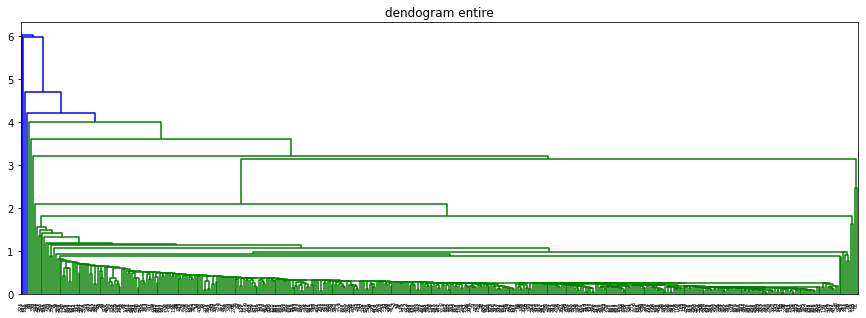

In [67]:
plt.figure(figsize=(15,5))
plt.title('dendogram entire')
den=shc.dendrogram(shc.linkage(df_std))

In [68]:
#Agglomarative clustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [70]:
agg_cluster=AgglomerativeClustering(n_clusters=2)

In [71]:
agg_cluster.fit_predict(df_std)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

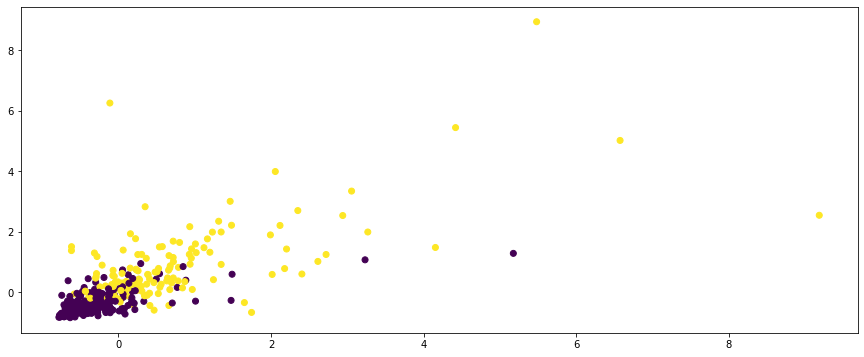

In [86]:
plt.figure(figsize=(15,6))
plt.scatter(df_std['Milk'],df_std['Grocery'],c=agg_cluster.labels_)

In [74]:
#Normalizing for entire dataset

In [75]:
from sklearn.preprocessing import normalize

In [77]:
df_final_norm=pd.DataFrame(normalize(data_final),columns=data_final.columns)

In [79]:
df_final_norm

Fresh      Milk   Grocery    Frozen
0    0.718443  0.547580  0.428775  0.012136
1    0.454875  0.632326  0.616728  0.113574
2    0.469924  0.651517  0.568376  0.177895
3    0.863078  0.077817  0.274636  0.416672
4    0.917276  0.219432  0.291955  0.158794
..        ...       ...       ...       ...
435  0.778193  0.315726  0.419894  0.344126
436  0.992619  0.036210  0.019332  0.114120
437  0.393181  0.419076  0.818318  0.011824
438  0.955948  0.184036  0.207354  0.096431
439  0.676845  0.412373  0.609574  0.015786

[440 rows x 4 columns]

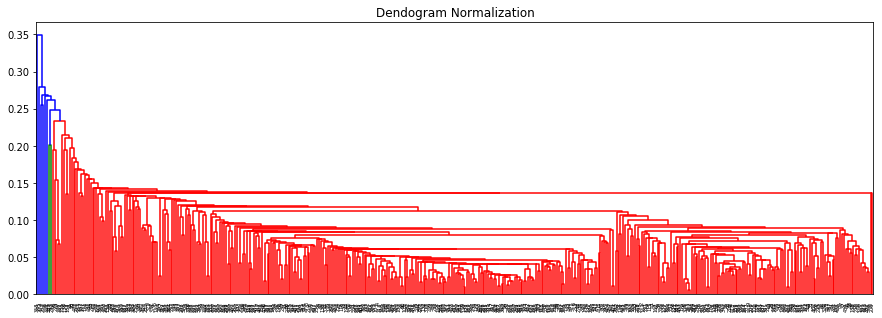

In [80]:
plt.figure(figsize=(15,5))
plt.title('Dendogram Normalization')
den=shc.dendrogram(shc.linkage(df_final_norm))

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
agg_clu1=AgglomerativeClustering(n_clusters=2)

In [83]:
agg_clu1.fit_predict(df_final_norm)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

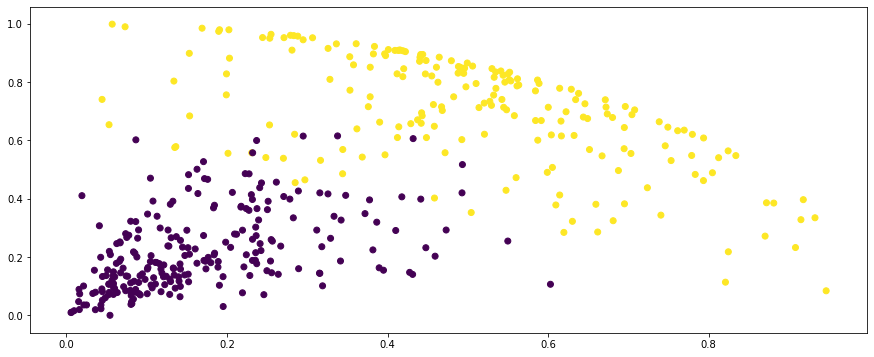

In [85]:
plt.figure(figsize=(15,6))
plt.scatter(df_final_norm['Milk'],df_final_norm['Grocery'],c=agg_clu1.labels_)